# Day 1

## Problem 1

In [25]:
# import libraries etc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

from scipy.optimize import newton
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Matplotlib magic
%matplotlib inline


# global settings
plt.rcParams['font.size'] = 20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['legend.fontsize']=20
plt.rcParams['axes.labelsize']=20
plt.rc('figure', titlesize=20)

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    #this is a function to create a new colormap
    new_cmap = mplc.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmapT = plt.get_cmap('seismic')
new_cmap = truncate_colormap(cmapT, 0.5, 1)

In [3]:
#plot the contourf plots
def plotcontourf(X,Y,Z,minV=0,maxV=90,colormap=plt.get_cmap('jet'),title='simulation',
                 varlabel='$^{\circ}$',Xname='longitude',Yname='latitude'):
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(1,1,1)
    norm = mplc.Normalize(minV,maxV)
    A=(maxV-minV)/40
    contours=plt.contourf(X, Y, Z, np.arange(minV, maxV, A), cmap=colormap,norm=norm,extend='both')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    cbar=plt.colorbar(contours,cmap=colormap,cax=cax)
    cbar.ax.set_title(varlabel, color='k',weight='bold',fontsize=20, horizontalalignment= 'left')
    ax.set_ylabel(Yname)
    ax.plot([0,40],[274,274], lw=5, c="k") #snowball state
    icefreeT=[274+d for d in X] #for ice free
    ax.plot(X,icefreeT,lw=5,c='k')
    ax.text(5, 265, 'Ice covered surface', fontsize=20, fontweight= 'bold',
    verticalalignment='top')
    ax.text(5, 300, 'Ice free surface', fontsize=20, fontweight= 'bold',
    verticalalignment='top')
    ax.text(15, 285, 'Partly ice-covered surface', fontsize=20, fontweight= 'bold',
    verticalalignment='top')
    ax.set_xlabel(Xname)
    ax.set_title(title,fontweight='bold')
    plt.show()

A common approximation for the variation of temperature with latitude is 

$T(\phi) = T_e - \Delta_T\sin{(\phi)}^2$

Where $T(\phi)$ is the temperature at latitude $\phi$, $T_e$ is the temperature at the equator, $\Delta_T$ is the
equator-pole temperature gradient.

In [4]:
# here I define the temperature profile with different exponents
#inputs to the functions are Te, deltaT and latitudes

def get_temp_profile(equator_temperature, eq_pole_gradient, latitudes):
    
    return equator_temperature - eq_pole_gradient*np.sin(latitudes)**2

def get_temp_profile_4(equator_temperature, eq_pole_gradient, latitudes):
    
    return equator_temperature - eq_pole_gradient*np.sin(latitudes)**4

def get_temp_profile_6(equator_temperature, eq_pole_gradient, latitudes):
    
    return equator_temperature - eq_pole_gradient* np.sin(latitudes)**6

def get_temp_profile_8(equator_temperature, eq_pole_gradient, latitudes):
    
    return equator_temperature - eq_pole_gradient*np.sin(latitudes)**8

def get_weighted_average(quantity, latitudes):
    
    return np.average(quantity, weights=np.cos(latitudes))

Let's start by calculating the average planetary temperature (T$_p$) for the temperature range of equator temperature (T$_e$) and different $\Delta$T 's. For plotting the lines for separation of the different states, we plot the lines as following:

$ T_e \leq 274K $

for the snowball state, then the delta T can be whatever. For the ice free state, we define our $T_e$ as following:

$ T_e > 274K + \Delta T $

By doing this, the difference between the $T_e$ and $\Delta T $ is always greater than the limit for SB state (274K). These lines are plotted on the plots as computed in the plotcontourf-function.

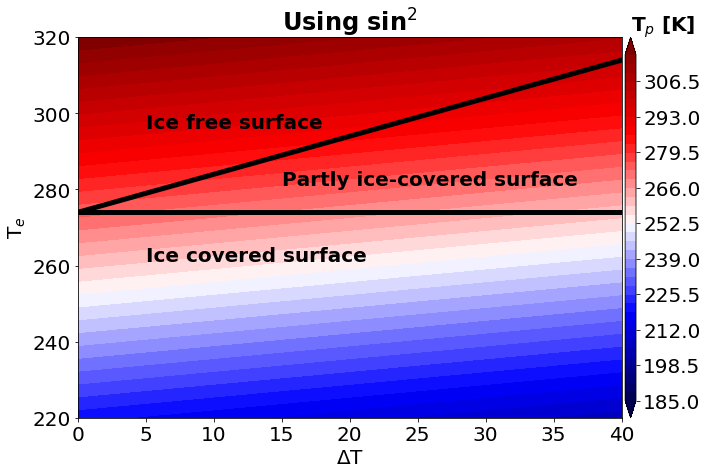

In [7]:
Te = np.arange(220,321,1) #create Te
deltaT=np.arange(0,41,1) #create deltaT
latsnew=np.linspace(-np.pi/2,np.pi/2,100) #latitudes in radians
TP=[] #creating an empty array for saving the Tp's for each deltaT used
for T in Te:
    Tprofrad=[get_temp_profile(T,t,latsnew) for t in deltaT]
    Tavrad=[get_weighted_average(tt,latsnew) for tt in Tprofrad] #for the planetary average
    TP.append(Tavrad) #shape of (len(deltaT),len(Te))

    #and now lets plot it
plotcontourf(deltaT,Te,TP,minV=185,maxV=320,title='Using sin$^2$',varlabel='T$_p$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=plt.get_cmap('seismic'))


## Problem 2

Here we are supposed to change the exponent for the canlculation of your $T_p$ and see if that has any implications. Recall the equaiton above:

$T(\phi) = T_e - \Delta_T\sin{(\phi)}^2$

This would implicate, with higher exponents (exp) the value of $\sin{(\phi)}^{exp}$ will be smaller, thereby $\Delta_T\sin{(\phi)}^{exp}$ is smaller, resulting that the $T_p$ is larger for larger exponents, larger impact for higher $\Delta_T$'s. Lets see if this is correct. I also plot the difference between the "original" with 2 as exponent with the new one to better highlight the differences, if there are any. 

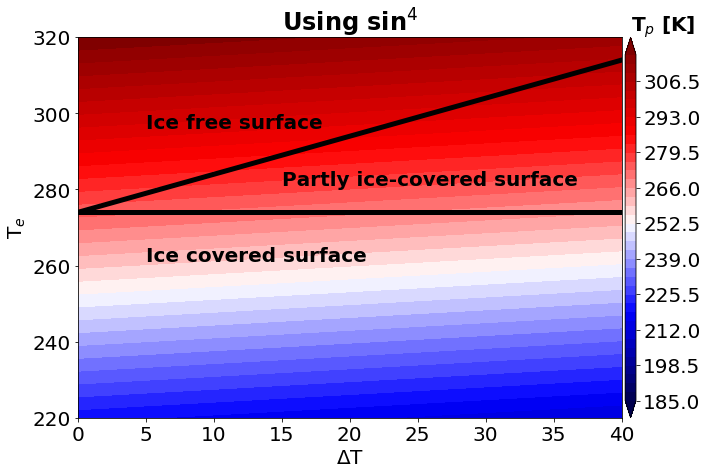

In [8]:
#exponent = 4
Te = np.arange(220,321,1)
deltaT=np.arange(0,41,1)
latsnew=np.linspace(-np.pi/2,np.pi/2,100) #radians
TP_4=[]
for T in Te:
    Tprofrad_4=[get_temp_profile_4(T,t,latsnew) for t in deltaT]
    Tavrad_4=[get_weighted_average(tt,latsnew) for tt in Tprofrad_4] #planetary average
    TP_4.append(Tavrad_4)

plotcontourf(deltaT,Te,TP_4,minV=185,maxV=320,title='Using sin$^4$',varlabel='T$_p$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=plt.get_cmap('seismic'))

min: 0.0, max: 5.33


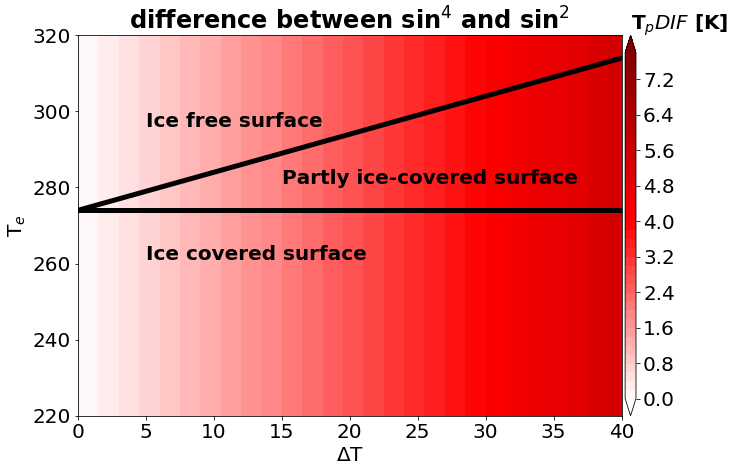

In [9]:
#calculate the difference between exp 4 and exp 2
Dif4 = np.zeros(np.shape(TP))
for i in range(len(TP)):
    for j in range(np.shape(TP)[1]):
        Dif4[i][j] = TP_4[i][j] - TP[i][j]

print('min: ' + str(round(Dif4.min(),2)) +
      ', max: ' + str(round(Dif4.max(),2)) )

plotcontourf(deltaT,Te,Dif4,minV=0,maxV=8,title='difference between sin$^4$ and sin$^2$',varlabel='T$_p DIF$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=new_cmap)

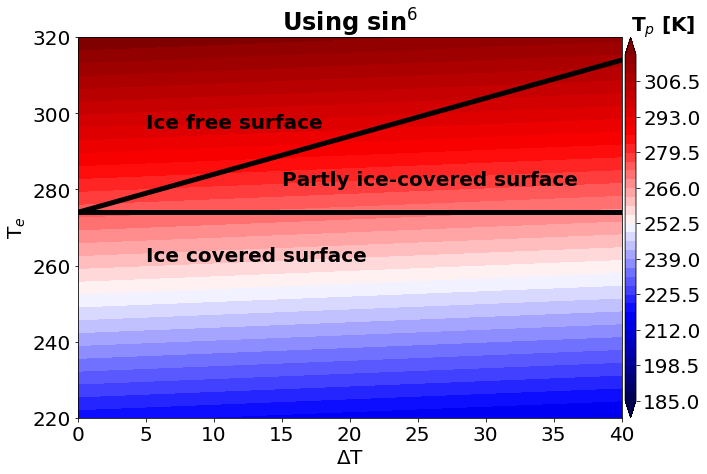

In [10]:
Te = np.arange(220,321,1)
deltaT=np.arange(0,41,1)
latsnew=np.linspace(-np.pi/2,np.pi/2,100) #radians
TP_6=[]
for T in Te:
    Tprofrad_6=[get_temp_profile_6(T,t,latsnew) for t in deltaT]
    Tavrad_6=[get_weighted_average(tt,latsnew) for tt in Tprofrad_6] #planetary average
    TP_6.append(Tavrad_6)

plotcontourf(deltaT,Te,TP_6,minV=185,maxV=320,title='Using sin$^6$',varlabel='T$_p$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=plt.get_cmap('seismic'))

min: 0.0, max: 7.62


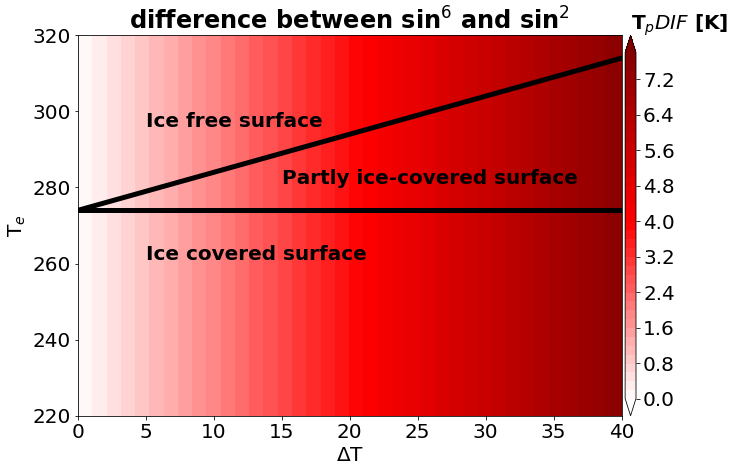

In [11]:
Dif6 = np.zeros(np.shape(TP))
for i in range(len(TP)):
    for j in range(np.shape(TP)[1]):
        Dif6[i][j] = TP_6[i][j] - TP[i][j]

print('min: ' + str(round(Dif6.min(),2)) +
      ', max: ' + str(round(Dif6.max(),2)) )

plotcontourf(deltaT,Te,Dif6,minV=0,maxV=8,title='difference between sin$^6$ and sin$^2$',varlabel='T$_p DIF$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=new_cmap)

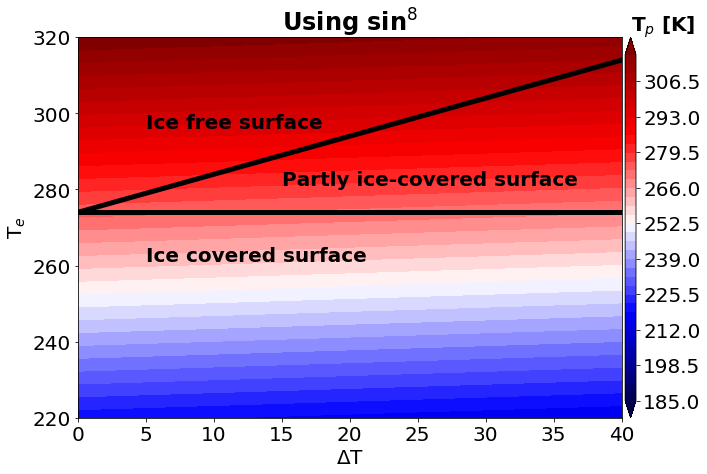

In [12]:
Te = np.arange(220,321,1)
deltaT=np.arange(0,41,1)
latsnew=np.linspace(-np.pi/2,np.pi/2,100) #radians
TP_8=[]
for T in Te:
    Tprofrad_8=[get_temp_profile_8(T,t,latsnew) for t in deltaT]
    Tavrad_8=[get_weighted_average(tt,latsnew) for tt in Tprofrad_8] #planetary average
    TP_8.append(Tavrad_8)

plotcontourf(deltaT,Te,TP_8,minV=185,maxV=320,title='Using sin$^8$',varlabel='T$_p$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=plt.get_cmap('seismic'))

min: 0.0, max: 8.89


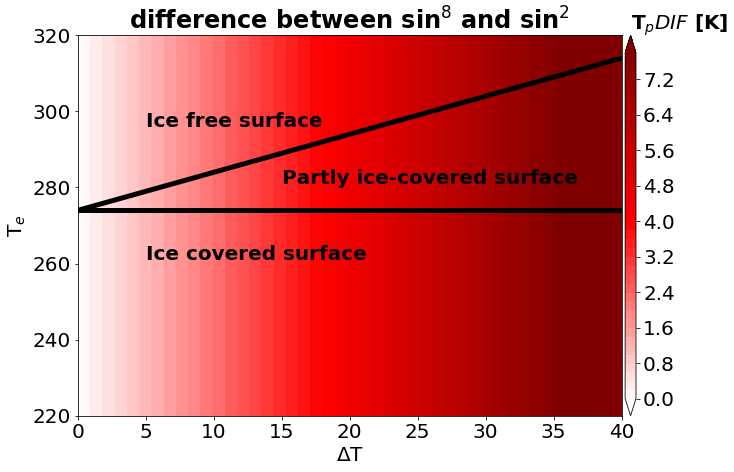

In [13]:
Dif8 = np.zeros(np.shape(TP))
for i in range(len(TP)):
    for j in range(np.shape(TP)[1]):
        Dif8[i][j] = TP_8[i][j] - TP[i][j]

print('min: ' + str(round(Dif8.min(),2)) +
      ', max: ' + str(round(Dif8.max(),2)) )

plotcontourf(deltaT,Te,Dif8,minV=0,maxV=8,title='difference between sin$^8$ and sin$^2$',varlabel='T$_p DIF$ [K]',Xname='$\Delta$T',Yname='T$_e$',colormap=new_cmap)

In [14]:
print(min(min(TP_4)),min(min(TP_6)),min(min(TP_8))) #here we notice the increase in the max Tp

212.00268627948012 214.28859273243515 215.5585409124395


We notice that the planetary temperature is increasing faster for higher exponents, so the contours are "pushed down". This is seen mostly for high $\Delta$T. So the hypothesis I presented in the start is valid. The positive values in the difference-plots mean that the new $T_p$ is higher than for the exponent of 2. Since the effect of ocean heat transport (OHT) can be represented by varying the temperature profile (changing the exponent), we notice how an increase in OHT also influences the $T_p$ due to the transport of energy.

# Day 2

## Problem 1

We need to use the logistic albedo instead of the quadratic one and explain how the dynamics changes due to changes made in the exponent. The net radiation can be expressed as:


\begin{equation}
\qquad
net_{rad} =  \frac {S_0}{4}\left( 1-\alpha \right) + CF - OLR \left( CO_2, T \right)
\end{equation} 

where OLR is the outgoing longwave radiation seen from the space, CR is cloud forcing and $\alpha$ is the albedo.
Now let's import the functions for calculating the OLR, albedo and net radiation. S$_0$ is the solar constant at TOA.

In [26]:
#Tables and functions for doing polynomial fit to OLR(CO2,T)
#Modified for Neoproterozoic review paper calculations.
#Includes effect of pressure broadening, and keeping mass of N2/O2 air
#fixed at 1 bar.

#Note that the argument is not pCO2, but a measure of the
#mass of CO2 in the atmosphere -- the pressure the CO2 would
#have in isolation. Thus, pCO2bar/g is the mass added, and 12/44 of
#this is the mass of carbon added per square meter of surface.

#%-------------Table:Cubic fit to (T-275)----------------------------------------------------
#%**Layout: Make sure this table comes after the corresponding figure
#%Y = M0 + M1*x + ... M8*x\u8\n + M9*x\u9
#$CO_2$ , $a_o$   , $a_1$  , $a_2$      ,  $a_3$     \\
CO2Vals = [1,10.,100.,1000.,10000.,100000.,200000.]
logCO2Vals = [np.log(co2) for co2 in CO2Vals]
fitTcoeffs = []
#1 Pa
fitTcoeffs.append([273.64, 129.45, -23.005, -24.558])
#10Pa 
fitTcoeffs.append([261.53, 126.63, -15.683, -20.914])
#100 Pa
fitTcoeffs.append([247.92, 120.72, -9.6234, -16.334])
#1000 Pa
fitTcoeffs.append([231.35, 111.94, -3.4677, -11.163])
#10000 Pa
fitTcoeffs.append([205.21, 97.516, 7.7354, -1.9642])
#100000 Pa
fitTcoeffs.append([150.83, 61.94, 21.96, 13.443])
#200000 Pa
fitTcoeffs.append([125.16, 44.672, 23.01, 15.982])

#for i in range(len(fitTcoeffs[0])):
#    fitTcoeffs[:][i].reverse()

#\caption{Coefficients for polynomial fit $OLR = a_o + a_1 x + a_2 x^2 + a_3 x^3$,
#where $x = T_g - 275$. Calculation carried out with $rh = .5$.}
#%---------------------------------------------------------------------------------------------


#CO2 stand-alone pressure in Pa
def OLRT(CO2,T):
    x = (T-280.)/(330.-280.)
    y = np.log(CO2)
    #interpolate coefficients
    coeffs = []
    for i in range(len(fitTcoeffs[0])):
        a = [fitTcoeffs[j][i] for j in range(len(logCO2Vals))]
        coeffs.append(interp1d(logCO2Vals, a, 'linear', fill_value='extrapolate')(y))
    #Evaluate the polynomial
    #print(np.array(coeffs), x)
    return np.polyval(coeffs[::-1],x)

In [27]:
def albedo(T):
    
    if T <= T_ice_covered:
        return albedo_ice
    
    if T >= T_ice_free:
        return albedo_ocean
    
    r = (T - T_ice_free)**2/(T_ice_covered - T_ice_free)**2

    return albedo_ocean + (albedo_ice - albedo_ocean)*r

In [28]:
def albedo_logistic(T, exponent):
    
    if T <= T_ice_covered:
        return albedo_ice
    
    if T >= T_ice_free:
        return albedo_ocean
    
    T_mid = (T_ice_free + T_ice_covered)/2
    
    r = 1./(1 + np.exp(-exponent*(T - T_mid)))
    #print(r)
    # old = r = (T - T_ice_free)**2/(T_ice_covered - T_ice_free)**2
    return albedo_ice - (albedo_ice - albedo_ocean)*r

def net_radiation(co2, T, exponent, logistic=True):
    # We modified this function to use either the logistic expression or the quadratic expression for the albedo
    
    if co2 < 0:
        return 1e5
    if logistic:
        return solar_constant*(1 - albedo_logistic(T,exponent))/4 + 20 - OLRT(co2, T) # 20 (cloud forcing) is the contribution due to clouds (reducing OLR)
    
    else:
        return solar_constant*(1 - albedo(T))/4 + 20 - OLRT(co2, T)

T_mid = 275.0


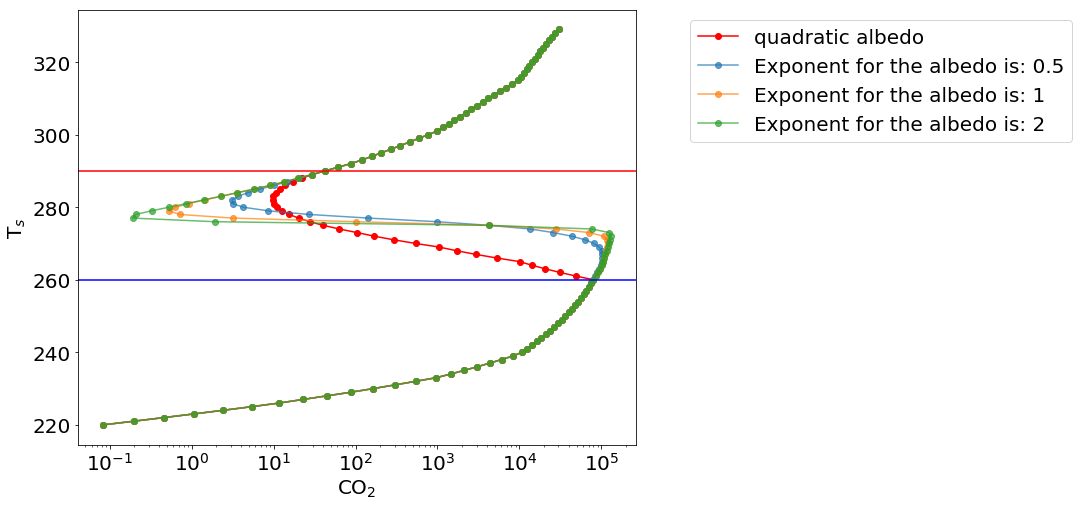

In [29]:
# here we define the requiring parameters and use the newton functio to calcualte the CO2 - OLR - T_surf dependence.

fig=plt.figure(figsize=(10,8))
T_ice_free = 290 
T_ice_covered = 260

print('T_mid = ' + str((T_ice_free + T_ice_covered)/2))

albedo_ocean = 0.2 #low albedo over oceans (more is absorbed)
albedo_ice = 0.65 #higher albedo over ice (less SW is absorbed)

solar_constant = 0.94*1367 #model was initially used for a time billions a year ago, not as bright as today

temperatures = range(220, 330) #range of temperatures


guess = 1e-2
list_co2=[]
for temperature in temperatures:
    try:
        co2 = newton(net_radiation, guess, args=(temperature,1, False), maxiter=200) #calculate the roots of a non-linear function
        list_co2.append(co2)
        #print(temperature, co2)
    except:
        list_co2.append(1e-4)

plt.semilogx(list_co2, temperatures, '-ro') #using the quadratic albedo
#for albedo_ice in [0.55, 0.6, 0.65]:
for exponent in [0.5,1,2]:
    list_co2 = []
    for temperature in temperatures:

        try:
            co2 = newton(net_radiation, guess, args=(temperature, exponent, True), maxiter=200) #calculate the roots of a non-linear function
            list_co2.append(co2)
            #print(temperature, co2)
        except:
            list_co2.append(1e-4)

    plt.semilogx(list_co2, temperatures, '-o',label=str(exponent),alpha=0.7)# using the logistic albedo with different exp.

plt.axhline(T_ice_covered,color='b')
plt.axhline(T_ice_free, color='r')
plt.xlabel('CO$_2$')
plt.ylabel('T$_s$')
Label=['Exponent for the albedo is: ' + str(ex) for ex in [0.5,1,2]]
Label.insert(0, "quadratic albedo")
plt.legend(Label,ncol=1,bbox_to_anchor=(1.3,0.5,0.5,0.5))
plt.show()

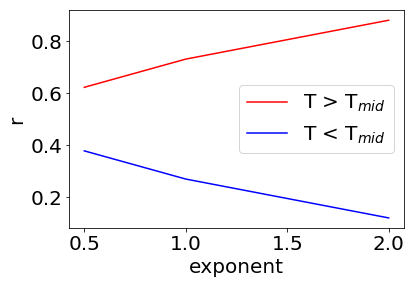

In [31]:
# this plot just shows the slope in the "r" for the albedo calculations, separated into temperatures above (red)
# and below (blue) the T_mid (275K), for different exponent to better analyze the figure above

c=[0.5,1,2]
y=[1/(1+math.exp(-cc)) for cc in c] #for T > T_mid
yy=[1/(1+math.exp(cc)) for cc in c] #for T < T_mid
plt.plot(c,y,color='r',label='T > T$_{mid}$')
plt.plot(c,yy,color='b',label='T < T$_{mid}$')
plt.ylabel('r')
plt.xlabel('exponent')
plt.legend()
plt.show()

In [33]:
#calculating the albedo
Temp=np.arange(220,330,1)
c=[0.5,1,2]
W=[[albedo_logistic(T, exponent) for T in Temp] for exponent in c] #for the logistic albedo
quadal=[albedo(T) for T in Temp] #for the quadratic albedo

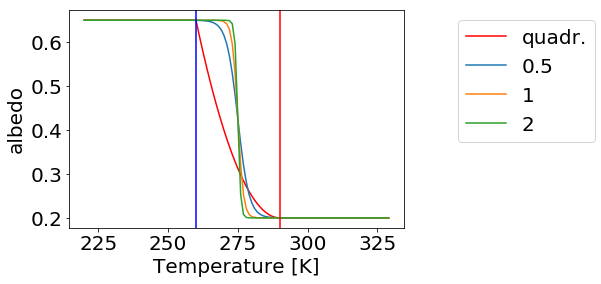

In [36]:
# plotting the albedos and the vertical lines for T_SB and T_IF
plt.plot(Temp,quadal,color='r')
for i in range(len(W)):
    plt.plot(Temp,W[i])
    plt.xlabel('Temperature [K]')
    plt.ylabel('albedo')
Label=[str(ex) for ex in [0.5,1,2]]
Label.insert(0,'quadr.')
plt.legend(Label,ncol=1,bbox_to_anchor=(1.1,0.5,0.5,0.5))
plt.axvline(T_ice_free, color='r')
plt.axvline(T_ice_covered, color='b')
plt.show()

What we can see is that for a Snowball state (where the temperature is lower than T$_{SB}$  = 260K), the albedo is high, the earth is ice-covered until the T$_{SB}$ is reached. For the quadratic albedo, we notice an immediate drop in the albedo (from 0.65) straight after a warming from that treshold temperature. This changes more smoothly towards the new albedo for the Ice free state (reached at T$_{IF}$ = 290 K). On the contrary, when we follow the constant OLR, lets say from an IF state, the system is more stable, so we need to decrease the CO$_2$ even more in order for the system to convert from a IF state to a SB state, but once it reaches its treashold, the change is rapid, and with a small change in temperature at this treshold, the albedo changes immediately from one to the other. The system is more stable for higher exponents in the logistic_albedo calculations, i.e. it is harder to change between states, but once it happens, it happens quickly. From a SB state, with increasing temperature, the OLR is increasing, so in order to keep the equilibrium, we need to lower the CO$_2$, which explains the why the eq. curves start from lower values of CO$_2$ but with higher OLR values with higher temperatures. The intermediate state is defined by the albedo, which is a function of the temperature. For temperatures between T$_{SB}$  = 260K and T$_{mid}$, the curve has a negative gradient, resulting in lower r-values for the calculation of the albedo (see the figure with the r vs. exp). When increasing the temperature from the T$_{mid}$ to the T$_{IF}$  = 290K, the gradient is positive for r, also obtaining larger values. For higher exponents, r is either smaller (with negative gradient) or larger (with positive gradients). In other worlds, there is a larger lag before the one state is converted to the other state, thereby giving a rapid change in the albedo once the treshold is reached. The equilibrium state in the IF state is then reached again when OLR increases by increasing T$_{surf}$. We also notice that the surface temperature is controlling the albedo.

## Problem 2

In this exercise, we are supposed to use our 0.5 dimensional model, with one shell (one atmosphere) and figure out a energy balances for both the surface (s) and the shell (referred here as the atmosphere, a). 

<b>Case 1:</b> The shell is absorbing all the SW, but is transparent to LW.

<br>
    
<b>Case 2:</b> The shell partly absorbs the radiation in both LW ($\epsilon_L$) and SW ($\epsilon_S$).

### Case 1

The energy balance (IN = OUT) can be extpressed as following:

For the Earth:

\begin{equation}
\qquad
\sigma T_A^4 = \sigma T_S^4 
\end{equation} 

For the Shell:

\begin{equation}
\qquad
S_I = 2\sigma T_A^4
\end{equation} 


From the energy balance calculated for the Earth, we notice that:

\begin{equation}
\qquad
T_A = T_S
\end{equation}



### Case 2

The energy balance (IN = OUT) can be extpressed as following:

For the Earth:

\begin{equation}
\qquad
\epsilon_L \sigma T_A^4 + (1-\epsilon_S) S_I = \sigma T_S^4 
\end{equation} 

For the Shell:

\begin{equation}
\qquad
\epsilon_S S_I + \epsilon_L \sigma T_S^4 = 2\epsilon_L \sigma T_A^4 
\end{equation} 

By playing around with the equations, and starting off by extracting the incoming solar radiation and dividing by the Boltzman constant, we then get the form of $\frac {T_S}{T_A} $ as:

\begin{equation}
\qquad
\frac {T_S}{T_A} = \sqrt[4]{\frac {\epsilon_L (2-\epsilon_S)}{(\epsilon_S + \epsilon_L - \epsilon_L \epsilon_S)}}
\end{equation} 


So now for the second question, if we want the temperature profile to be isothermal, i.e. not changing with height, so that T$_S$ = T$_A$, then the division with these values is equal to 1. Therefore, the above equation can be written as: 

\begin{equation}
\qquad
1 = \sqrt[4]{\frac {\epsilon_L (2-\epsilon_S)}{(\epsilon_S + \epsilon_L - \epsilon_L \epsilon_S)}}
\end{equation} 

So:

\begin{equation}
\qquad
1 = \frac {\epsilon_L (2-\epsilon_S)}{\epsilon_S + \epsilon_L - \epsilon_L \epsilon_S}
\end{equation} 

And

\begin{equation}
\qquad
 \epsilon_S + \epsilon_L - \epsilon_L \epsilon_S= 2\epsilon_L-\epsilon_S \epsilon_L
\end{equation} 

And we end up with:

\begin{equation}
\qquad
\epsilon_S = \epsilon_L
\end{equation} 

The temperatures are the same only if the absorbing coefficients of the shell for both LW and SW obtain the same value.
<br>

Let's go back to the first question. The relationship between T$_S$ and T$_A$ depends on the relationship between $\epsilon_S$ and $\epsilon_L$ due to the fourth square root. So if the square root is larger than 1, then also the rational number is larger than one, i.e. T$_S$ > T$_A$. This happens only when $\epsilon_L$ > $\epsilon_S$. Similarily, when the square root is smaller than one, then  T$_S$ < T$_A$ when $\epsilon_L$ < $\epsilon_S$. So with higher surface temperature, more LW is absorbed by the shell, and less is absorbed from the SW. The temperature of the shell is greater when it is absorbing more SW, then less SW is going to the surface of the earth, why the temperature is also lower at the surface than for the shell. The relationship for temperatures for the shell and the surface are inverse proportional to the relationship between the absorbtion of LW or SW radiation by the shell.

So for T$_S$ > T$_A$, we get:


\begin{equation}
\qquad
 2\epsilon_L-\epsilon_S \epsilon_L > \epsilon_S + \epsilon_L - \epsilon_L \epsilon_S
\end{equation}

And

\begin{equation}
\qquad
 \epsilon_L > \epsilon_S
\end{equation}

Similarily, when T$_S$ < T$_A$, then the root shall be <1, and:

\begin{equation}
\qquad
 2\epsilon_L-\epsilon_S \epsilon_L < \epsilon_S + \epsilon_L - \epsilon_L \epsilon_S
\end{equation}

And finally:

\begin{equation}
\qquad
 \epsilon_L < \epsilon_S
\end{equation}

# Day 3

## Problem 1

In this problem, we are asked to calculate the energy budgets for the surface and the TOA using a fully consistent dry radiative-convective model. Per each timestep, we also want to calculate if the model conserves energy, when calculating the dry enthaply in the column and comparing it with the energy input. 

The dry enthalpy can be calculated as:

\begin{equation}
\qquad
\int_{top}^{surf}\frac{c_p T}{g} dp
\end{equation} 

where c$_p$ is the specific heat capacity (1004.64 $\frac{J}{kg K}$), T is the temperature (in Kelvin) and g is the acceleration due to gravity (9.80665 $\frac{m}{s^2}$).

Let us first implement our model:

<IPython.core.display.Javascript object>


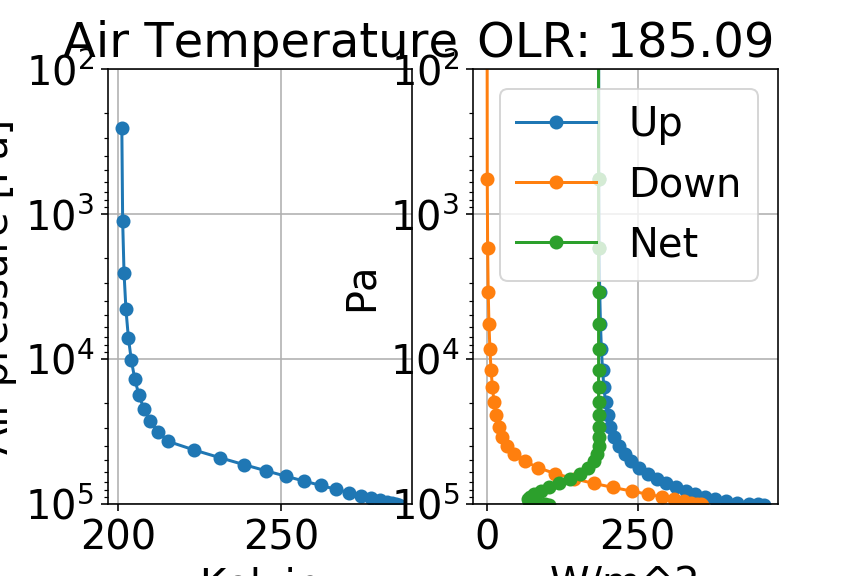

In [89]:
#%matplotlib notebook

#import the libraries needed
from sympl import (
    AdamsBashforth, PlotFunctionMonitor)
from climt import (
    Frierson06LongwaveOpticalDepth, GrayLongwaveRadiation, SimplePhysics, DryConvectiveAdjustment,
    get_default_state)
import climt
import sympl
from datetime import timedelta
import matplotlib.pyplot as plt
import metpy.calc as calc

#get the constants
c_p = sympl.get_constant('heat_capacity_of_dry_air_at_constant_pressure', 'J/kg/K')
g = sympl.get_constant('gravitational_acceleration', 'm/s^2')

# this is the function for plotting each state
def plot_function(fig, state): #model state as input
    ax = fig.add_subplot(1, 2, 1)

    ax.plot(
        state['air_temperature'].values.flatten(),
        state['air_pressure'].values.flatten(), '-o')
    ax.axes.invert_yaxis() #pressure other way
    ax.set_yscale('log') #natural scale for the atmosphere
    ax.set_ylim(1e5, 100.)
    ax.set_xlabel('Kelvin')
    ax.set_ylabel('Air pressure [Pa]')
    ax.set_title('Air Temperature')
    ax.grid()
    
# this plots the upwelling & downwelling LW radiation and the net radiation (UP-DOWN)
# also, the value for OLR is written in the header
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(
        state['upwelling_longwave_flux_in_air'].values.flatten(),
        state['air_pressure_on_interface_levels'].values.flatten(), '-o', label='Up')
    ax.plot(
        state['downwelling_longwave_flux_in_air'].values.flatten(),
        state['air_pressure_on_interface_levels'].values.flatten(), '-o', label='Down')
    ax.plot(
        state['upwelling_longwave_flux_in_air'].values.flatten() - state['downwelling_longwave_flux_in_air'].values.flatten(),
        state['air_pressure_on_interface_levels'].values.flatten(), '-o', label='Net')
    ax.axes.invert_yaxis()
    ax.set_yscale('log')
    ax.set_ylim(1e5, 100.)
    ax.set_xlabel('W/m^2')
    ax.set_ylabel('Pa')
    ax.grid()
    ax.legend()
    ax.set_title('OLR: {:.2f}'.format(state['upwelling_longwave_flux_in_air'].values[-1].item()))
    
    #plt.tight_layout()
    

monitor = PlotFunctionMonitor(plot_function)
diagnostic = Frierson06LongwaveOpticalDepth()
radiation = GrayLongwaveRadiation(tendencies_in_diagnostics=True)

#surface is saturated, LHF are now being calculated
boundary_layer=SimplePhysics(use_external_surface_specific_humidity=True) #add a surface, for courpling

dry_convection = DryConvectiveAdjustment() #insert convection

time_stepper = AdamsBashforth([radiation]) #creating a model timestepper for the model to step forward in time
timestep = timedelta(hours=4) #model timestep of 4 hours

state = get_default_state([radiation, diagnostic, boundary_layer, dry_convection]) #create the initial model state

dryenth=[]
LW_net=[]

#then step forward in time, updating the new model state per each timestep
for i in range(6*7*4*20): # 20 months
    state.update(diagnostic(state))
    diagnostics, state = time_stepper(state, timestep)
    state.update(diagnostics)
    
    diagnostics, new_state = boundary_layer(state,timestep)
    state.update(new_state)
    state.update(diagnostics)
    
    diagnostics, new_state = dry_convection(state,timestep)
    state.update(new_state)
    state.update(diagnostics)
    
    
    #calculate the dry enthaply
    dp = (state['air_pressure_on_interface_levels'].to_units('pascal')[0:-1] -
            state['air_pressure_on_interface_levels'].to_units('pascal')[1:])
    dp = dp.rename({'interface_levels': 'mid_levels'})
    sensible_heat = c_p*state['air_temperature']*dp/g
    totenth=sensible_heat.sum(dim='mid_levels')/(6*7*4*20*3600)
    totenth_value=totenth.values.flatten().tolist()
    dryenth.append(totenth_value)
    #print('Dry enthalpy is: ' + str(round(totenth_value[0],2)))
    
    LW_top=state['downwelling_longwave_flux_in_air'].values.flatten()[-1]-state['upwelling_longwave_flux_in_air'].values.flatten()[-1]
    LW_surf=state['upwelling_longwave_flux_in_air'].values.flatten()[0]-state['downwelling_longwave_flux_in_air'].values.flatten()[0]
    net_input=LW_top-LW_surf
    LW_net.append(round(net_input,2))
    if i % 20 == 0:
        monitor.store(state)
        
    state['eastward_wind'][:]=5. #include the wind

<IPython.core.display.Javascript object>


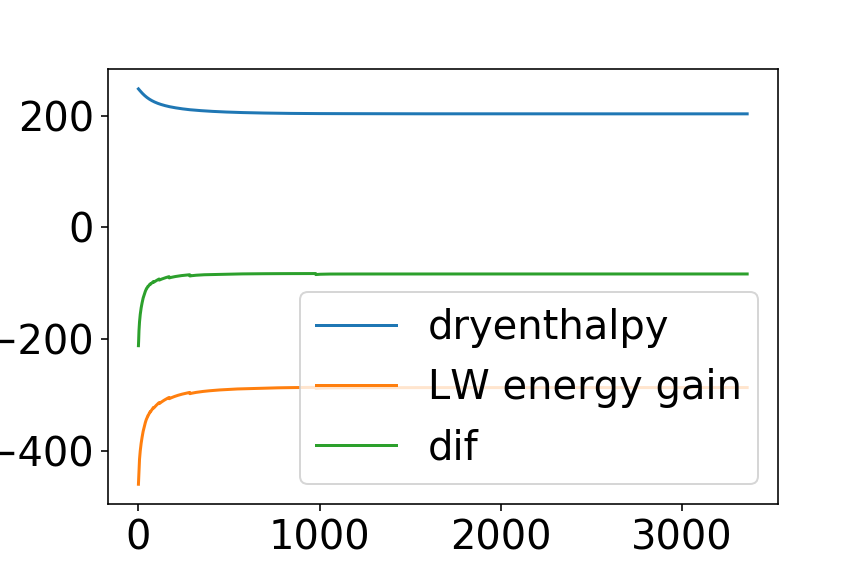

In [99]:
%matplotlib notebook
Y=6*7*4*20
X=np.arange(0,Y,1)
dif=[LW_net[i]+dryenth[i] for i in range(len(LW_net))]
plt.plot(X,dryenth,label='dryenthalpy')
plt.plot(X,LW_net,label='LW energy gain')

plt.plot(X,dif,label='dif')
plt.legend()
plt.show()